## Week 7 - Live Session

# Geo Plotting in Python
![Python logo](https://www.python.org/static/img/python-logo@2x.png "Python logo")

## DSS 615 Python Programming
## John Michl
Portions of this notebook used with permission of the publisher

> (C) Copyright 2019 by Deitel & Associates, Inc. and                    
> Pearson Education, Inc. All Rights Reserved. 

# Topics for Tonight

* Tools for Geographic Plotting
* Introduction to Plotly and Plotly Express
* Demo: Choropleth plotting of 2016 Presidential Election Results
* Demo: Bubble charts of COVID-19 Cases
* Review of Module Content
* Review of Module 7 Assignment Expectations

# Common Tools for Geo Plotting in Python

[Basemap Matplotlib Toolkit](https://matplotlib.org/basemap/users/index.html)
* Like Matplotlib, strong following though a bit dated
* Complicated install, many dependencies, large data set
* Appears it will be deprecated

[GeoPandas](https://geopandas.org/)
* Extends panadas datatypes to allow spatial operations
* Several dependencies including `shapley`, `fiona`, `descartes`, `matplotlib`
* Frequent updates since 2017
* Only offers static maps

# Common Tools for Geo Plotting in Python (continued)

[Plotly/Plotly Express](https://plotly.com/python/maps/)
* Wide variety of plots for Python and other languages
* No special installation required for maps
* Dash supports powerful web-apps

Other tools: [Toward Data Science article, July 28, 2020](https://towardsdatascience.com/best-libraries-for-geospatial-data-visualisation-in-python-d23834173b350) and [GISGeography](https://gisgeography.com/python-libraries-gis-mapping/)

# Beware of Abandoned Apps
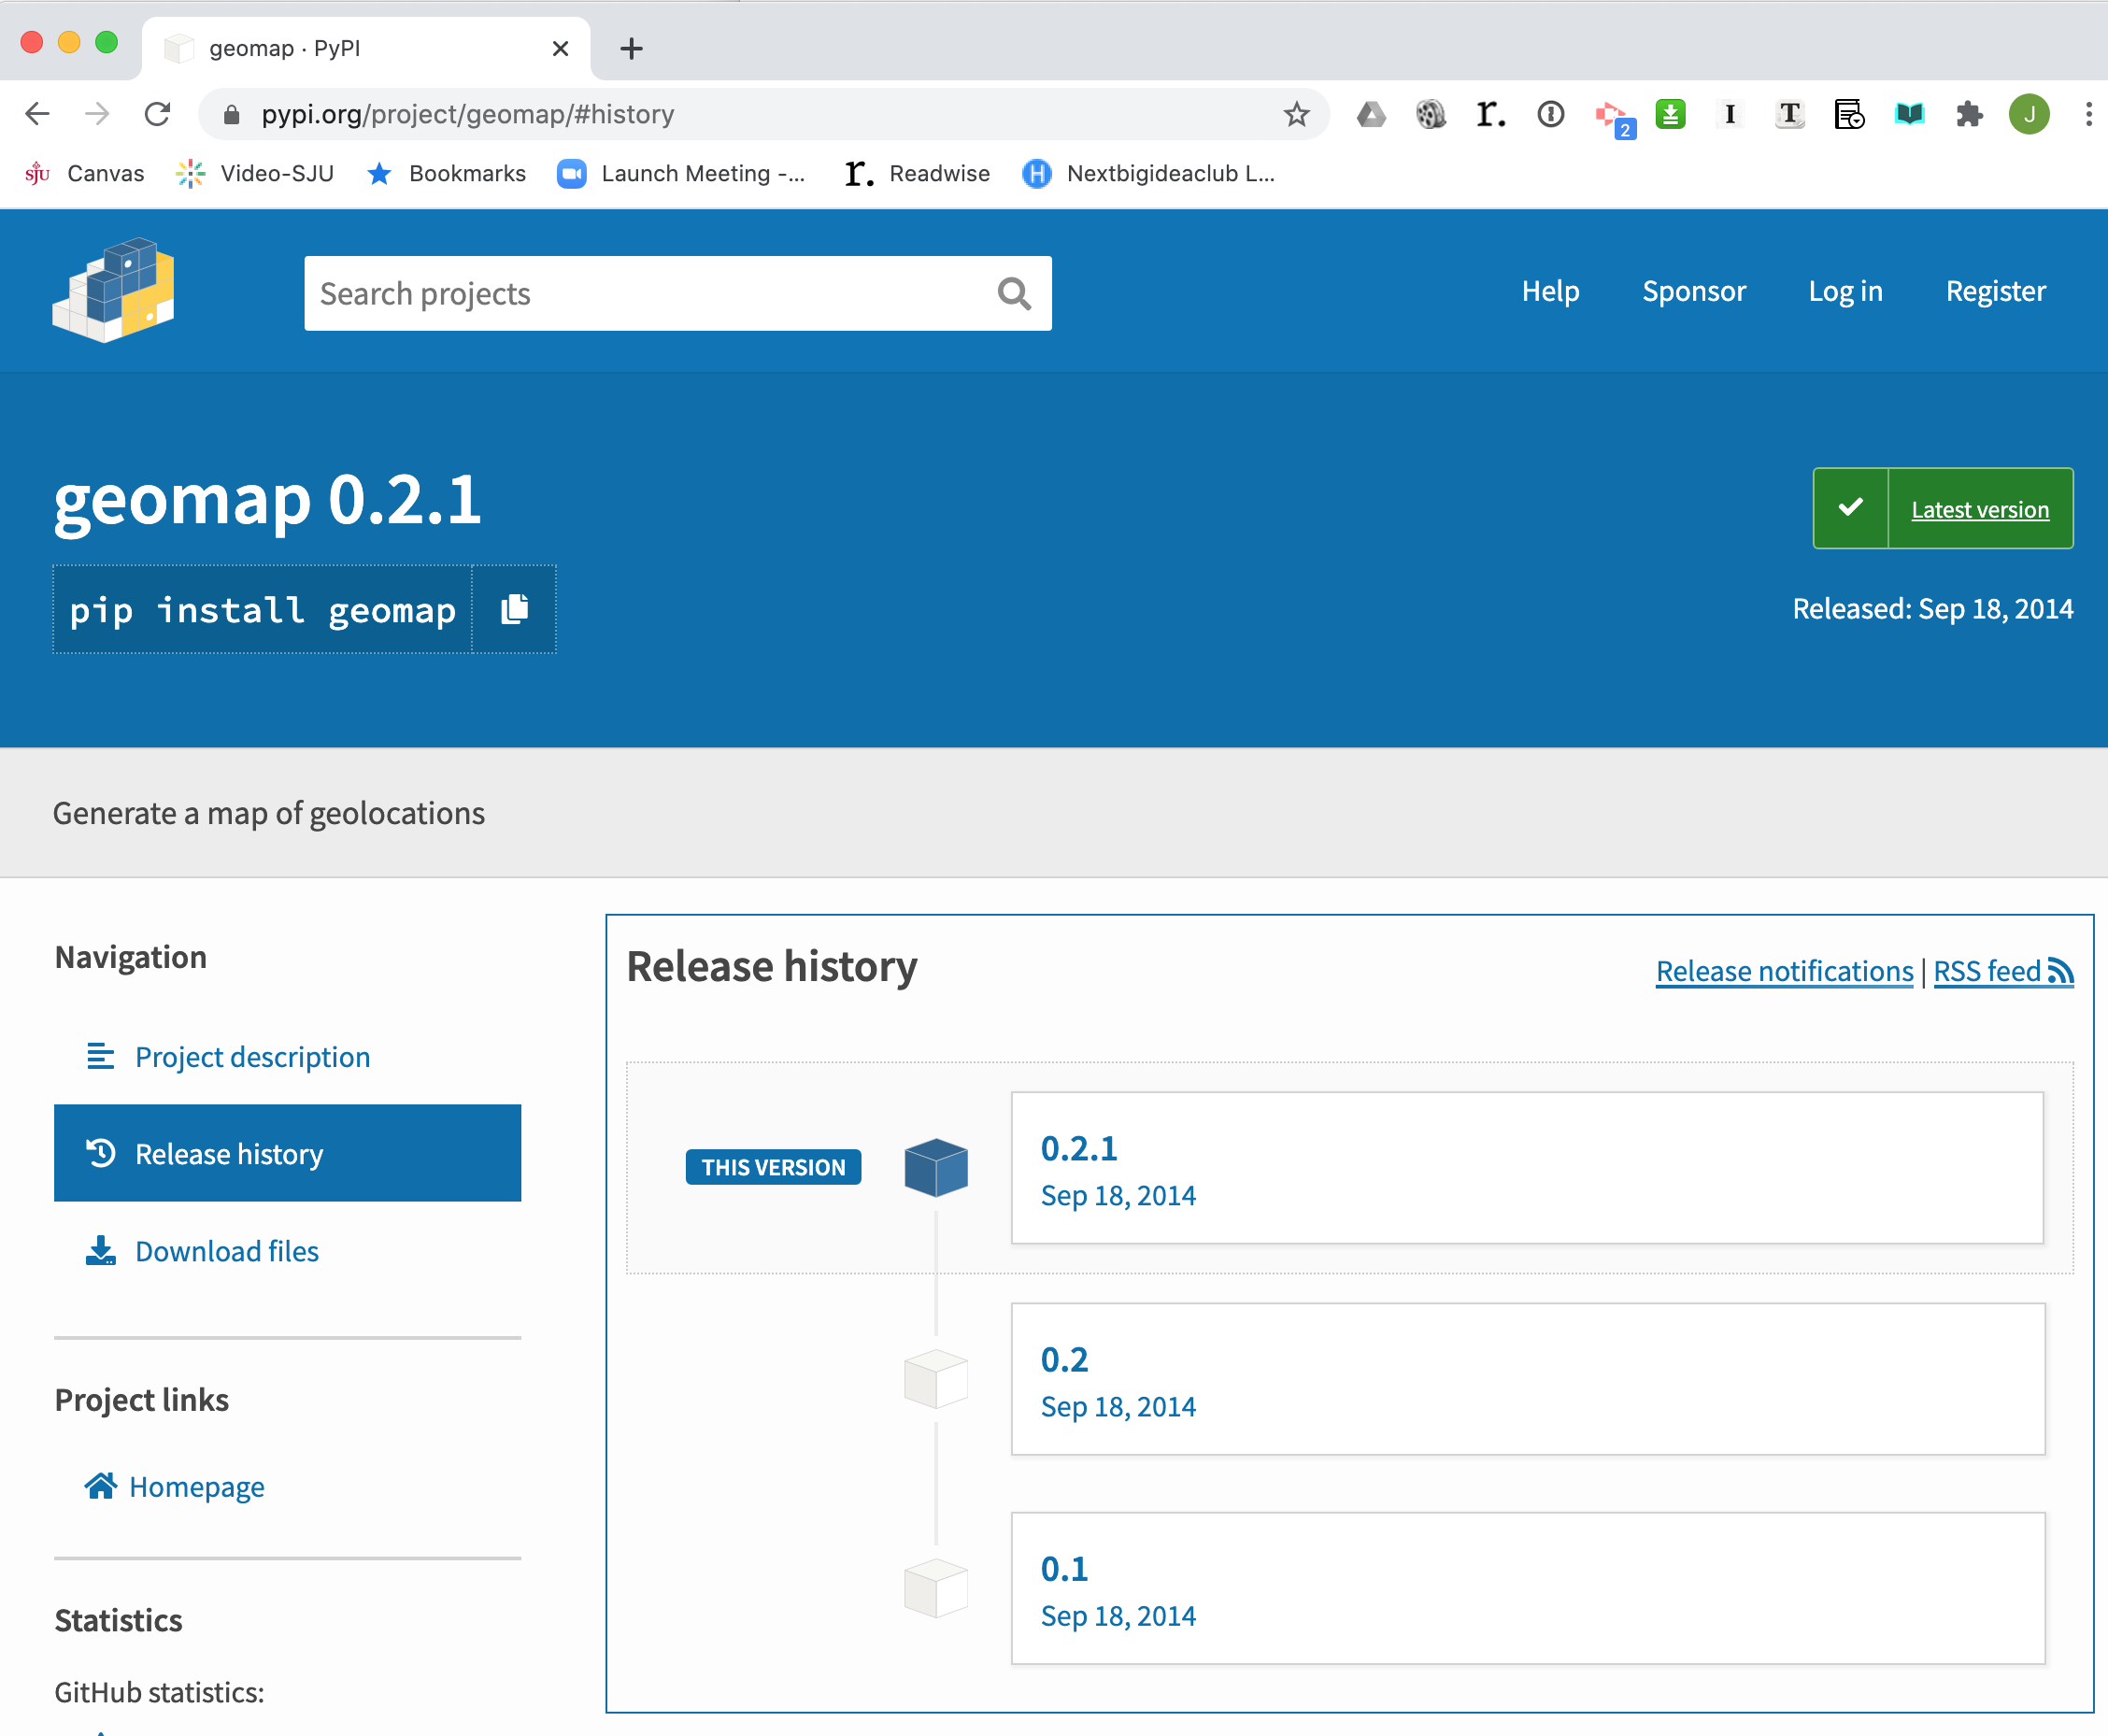

# Plotly (https://plotly.com/python/)

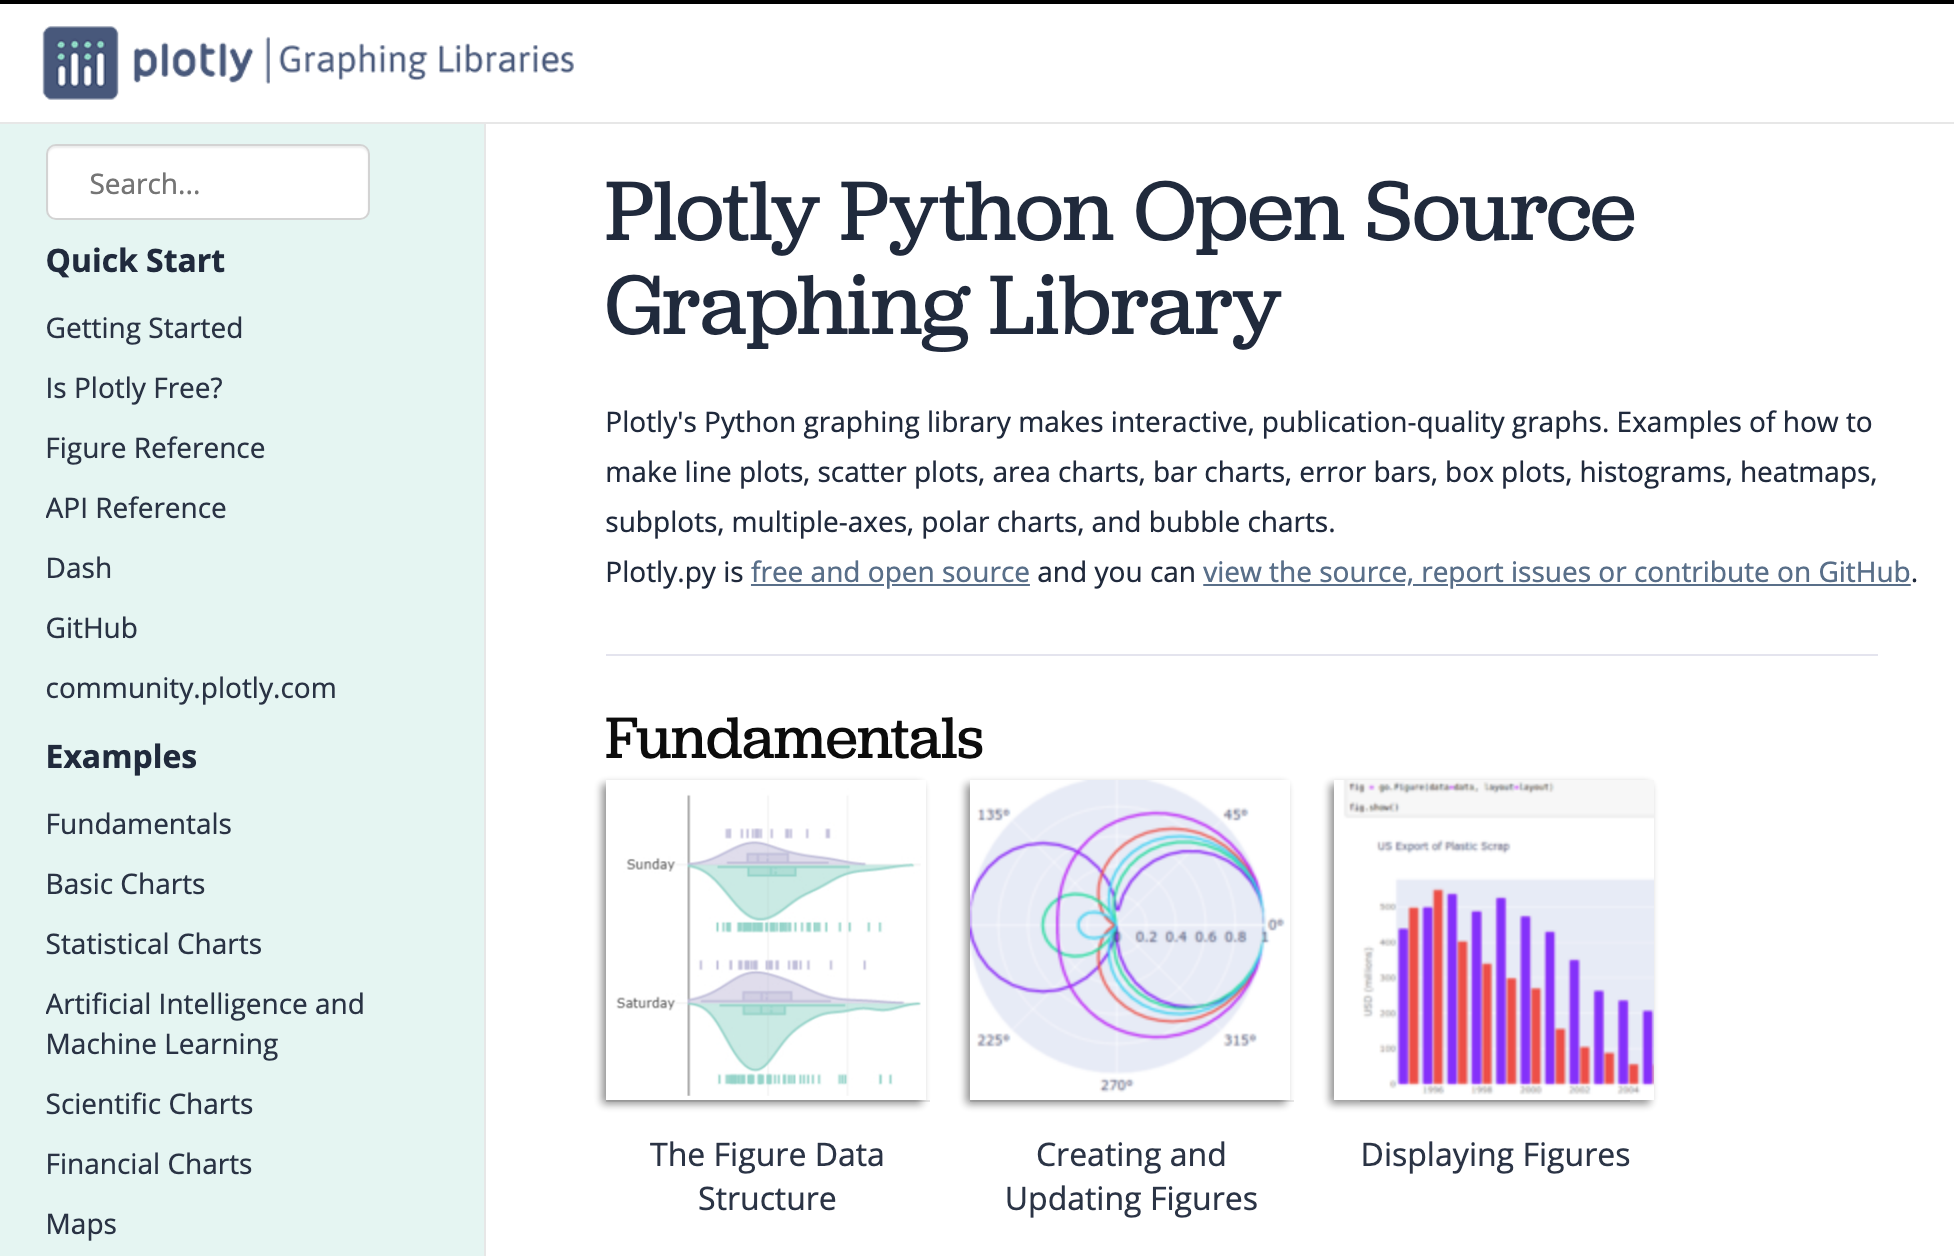

## Plotly Installation
https://plotly.com/python/getting-started/#installation

* `pip install plotly==4.14.3`
* `pip install "notebook>=5.3" "ipywidgets>=7.5"`   # for Jupyter notebook support
* `pip install plotly-geo==1.0.0`  # for extended geo support files, may not need

or via Anaconda

* `conda install -c plotly plotly=4.14.3`
* `conda install "notebook>=5.3" "ipywidgets>=7.5"`
* `conda install -c plotly plotly-geo=1.0.0`

# Choropleth plotting

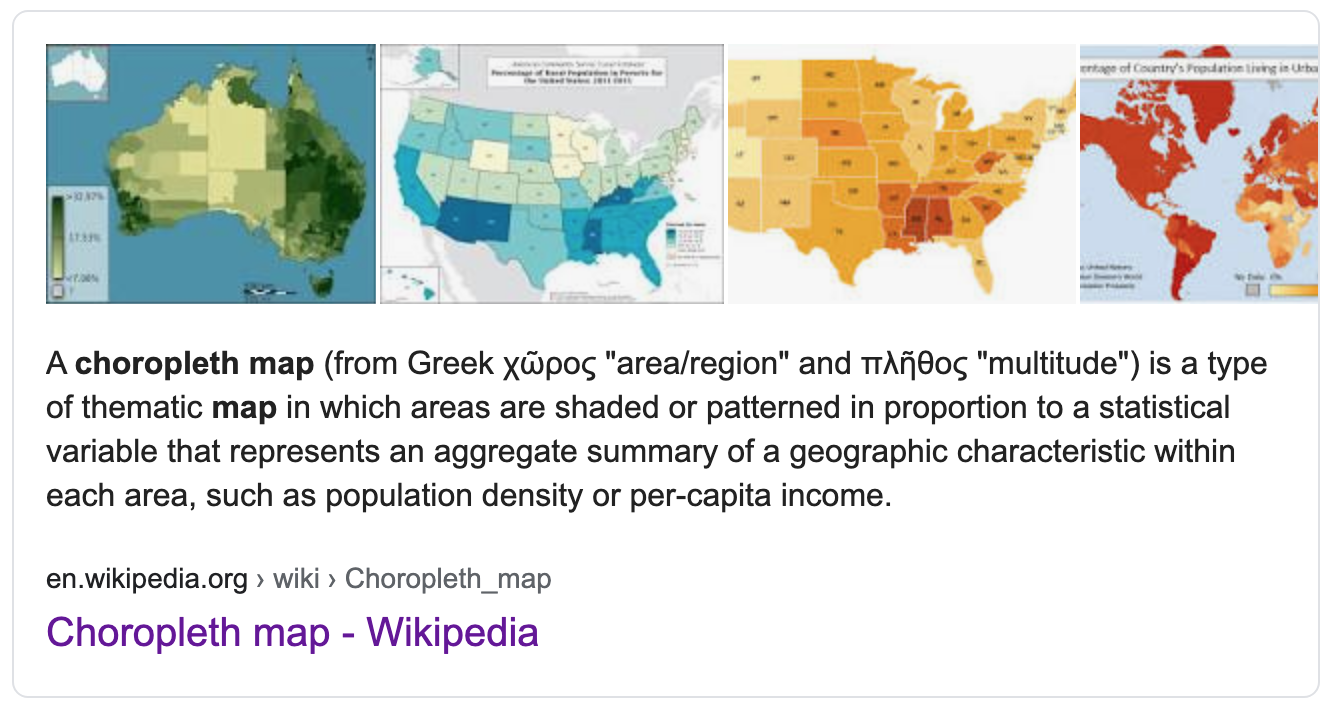
https://en.wikipedia.org/wiki/Choropleth_map

In [2]:
# Import dependencies

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [3]:
fig = px.choropleth(
    scope="usa",       # determines map projection
    locationmode="USA-states", 
    locations=["CA", "TX", "NY", "WI", "PA"],  # must match plotly's list of locations
    color=[1,25,3,50, 40]   # data associated with location
    )
fig.show()

# Named Scopes
Named Scopes:
* `scope` is the subset of the earth to draw
* Named scopes are: 'world', 'usa', 'europe', 'asia', 'africa', 'north america', 'south america'
* Each scope has a default projection type, center, roll, and bounds
* Some scopes have sub-scopes, e.g. US states have counties.
* https://plotly.com/python/reference/layout/geo/#layout-geo-scope

# Location Modes
Location: 
* List, numpy array, or pandas series of locations in the data set. 
* Sets the coordinates via location ID or names (e.g. "PA")
* Must matchup with location mode options.

Location Modes:
* `locationmode` determines the set of locations to match in the data set
* Options are: "ISO-3", "USA-states", "country names", "geojson-id"
* use geojson-id for custom locations e.g. counties, 
* https://plotly.com/python/reference/choropleth/#choropleth-locationmode

In [4]:
fig = px.choropleth(df,
                    locationmode = 'USA-states',
                    locations = 'Code',
                    scope = 'usa',
                    color = 'percR',
                    color_continuous_scale='Bluered_r'
                   )

NameError: name 'df' is not defined

# Mapping 2016 US Presidential Election Results

Summarized data from : https://worldpopulationreview.com/state-rankings/2016-election-results-by-state

Downoad, rename, and move the json file.
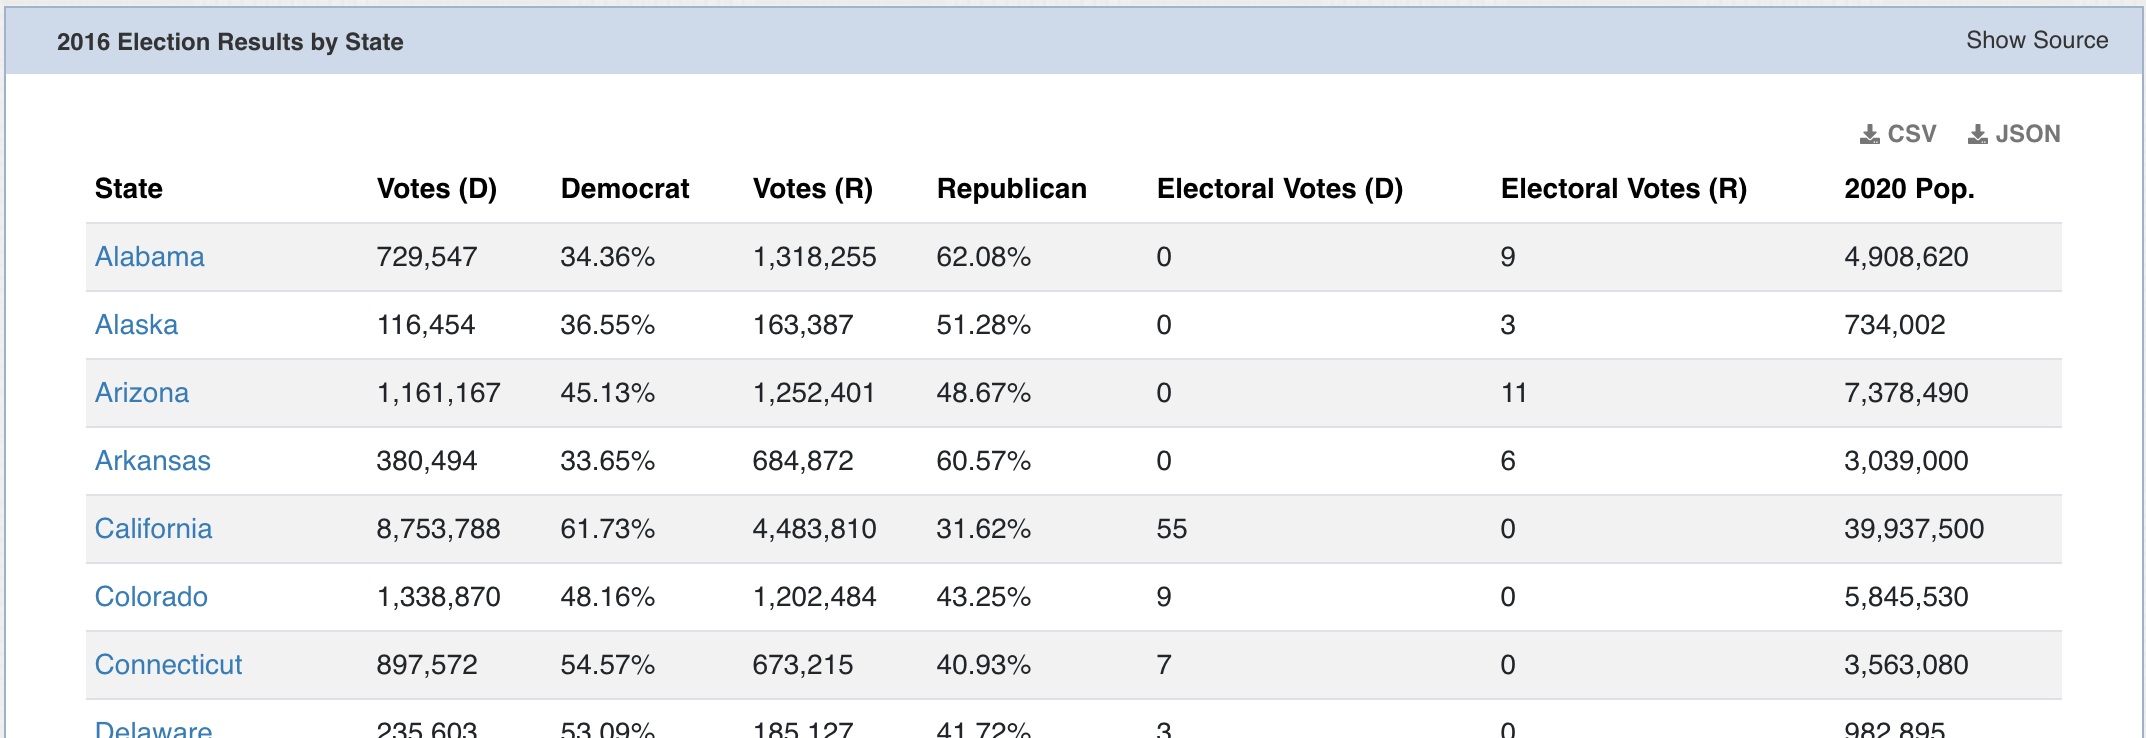

(For more detailed data, try [MIT Election Data Science Lab](https://electionlab.mit.edu/data))

In [5]:
# Load the data

file = '2016presdata.json'
df = pd.read_json(file)
df.head()

ValueError: Trailing data

Changes needed:
* Change missing values to 0
* Add column for percent of electoral votes for Republican candidate as `percER`
* *Note: Could do percent of electoral votes for Democrat candidate. Either way works.*
* Add state abbreviation as `Code` (needed for Plotly location)

### Replace missing electoral votes with zeros
* Data source doesn't show that a state got zero votes, instead shows it as missing
* Replace with zero and change to integer type

In [ ]:
# replace missing values
df.electoralRep = df.electoralRep.fillna(0.0).astype(int) 
df.electoralDem = df.electoralDem.fillna(0.0).astype(int) 

df.head()

### Add column to indicate percent of electoral votes to Republican candidate
* Only need percER or percED (Electoral Republican or Democrate
* Other party percent will be 1 - the percent that went to the first party
* This is only important in a few states who allow splitting the electoral college votes
* NOTE: This is important for 2020 election

In [ ]:
# Add column percER
df['percER'] = df['electoralRep']/(df['electoralRep']+df['electoralDem'])
df

### Create State Abbreviation Column called `Code`
* Start with dictionary of state names and abbreviations
* Could also save dictionary to json file for easy access in future
* Map to dataframe

In [ ]:
state_dict = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}


In [ ]:
# map the abbreviations

df['Code'] = df['State'].map(state_dict)
df.head()

### Data frame is complete, let's make a choropleth

In [ ]:
# Choropleth - Try 1
fig = px.choropleth(df,
                    title = '2016 Presidential Election',
                    scope = 'usa',
                    locationmode = 'USA-states',
                    locations = 'Code',
                    color = 'percER'
                   )

fig.show()

In [ ]:
# https://plotly.com/python/builtin-colorscales/

import plotly.express as px

fig = px.colors.sequential.swatches()
fig.show()

In [ ]:
# Cloropleth - Try 2 -- add color_continuous_scale
fig = px.choropleth(df,
                    title = '2016 Presidential Election',
                    scope = 'usa',
                    locationmode = 'USA-states',
                    locations = 'Code',
                    color = 'percER',
                    color_continuous_scale = 'Bluered'   # try with _r
                   )

fig.show()

In [ ]:
# Cloropleth - Try 3 -- different data
fig = px.choropleth(df,
                    title = '2016 Presidential Election',
                    scope = 'usa',
                    locationmode = 'USA-states',
                    locations = 'Code',
                    color = 'percR',       # < notice the change
                    color_continuous_scale = 'Bluered',
                   )

fig.show()

In [ ]:
# Choropleth - Try 4 -- more info in hover text
# https://plotly.com/python/hover-text-and-formatting/#customizing-hover-text-with-plotly-express
# hover_data accepts a list of column names or dictionary for advanced formatting
fig = px.choropleth(df,
                    title = '2016 Presidential Election',
                    scope = 'usa',
                    locationmode = 'USA-states',
                    locations = 'Code',
                    color = 'percR',       # < notice the change
                    color_continuous_scale = 'Bluered',
                    hover_name = 'State',   # title at top of box
                    hover_data = ['electoralRep','electoralDem']
                   )

fig.show()

In [ ]:
# Cloropleth - Try 5 -- hover, remove field, format fields

fig = px.choropleth(df,
                    title = '2016 Presidential Election',
                    scope = 'usa',
                    locationmode = 'USA-states',
                    locations = 'Code',
                    color = 'percR',       # < notice the change
                    color_continuous_scale = 'Bluered',
                    hover_name = 'State',
                    hover_data = {'Code':False,'votesDem':True,'votesRep':':,','percR':':%'}
                   )

fig.show()

# https://plotly.com/python/hover-text-and-formatting/#customizing-hover-text-with-plotly-express

In [ ]:
df.head()


## Bubble or Scatter Chart in Plotly
* Similar to Choropleth

In [ ]:
fig = px.scatter_geo(df,
                    title = '2016 Presidential Election',
                    scope = 'usa',      # same as Cloropleth
                    locationmode = 'USA-states', # same as Cloropleth
                    locations = 'Code',     # same as Cloropleth
                    size = 'votesDem',      # size of bubble <<<NEW KWARG
                    hover_name = 'State',
                    hover_data = {'Code':False,'votesDem':True,'votesRep':':,'}
                   )

fig.show()

In [ ]:
# Change color of bubble based on Party

color_discrete_map = {'D': 'rgb(0,0,255)', 'R': 'rgb(225,0,0)'}

fig = px.scatter_geo(df,
                    title = '2016 Presidential Election Bubble',
                    scope = 'usa',      # same as Cloropleth
                    locationmode = 'USA-states', # same as Cloropleth
                    locations = 'Code',     # same as Cloropleth
                    size = 'votesDem',      # size of bubble
                    color = 'win',
                    color_discrete_map = color_discrete_map,
                    hover_name = 'State',
                    hover_data = {'Code':False,'votesDem':True,'votesRep':':,'}
                   )

fig.show()

# Animating Geo Plots
* Animate Plotly plots with one parameter
* New data set 1976-2016 summarized Republican/Democrat votes for president(MIT data Set)

In [7]:
df1 = pd.read_csv('1976-2016-president.csv')
df1.head()
# percDem and percRep -- could be trouble later

Year State   votesDem  votesRep  votesTotal percDem percRep
0  1976    AK    44058.0     71555      115613   38.1%   61.9%
1  1976    AL   659170.0    504070     1163240   56.7%   43.3%
2  1976    AR   498604.0    267903      766507   65.0%   35.0%
3  1976    AZ   295602.0    418642      714244   41.4%   58.6%
4  1976    CA  3742284.0   3882244     7624528   49.1%   50.9%

In [8]:
fig = px.choropleth(df1,
                    scope = 'usa',
                    locationmode = 'USA-states',
                    locations = 'State',
                    color = 'percRep',      
                    color_continuous_scale = 'Bluered',
                    hover_name = 'State',
                    hover_data = {'State':False,'votesDem':':,','votesRep':':,'},
                    animation_frame="Year",
                    title = 'Popular Vote 1976 - 2016 Presidential Elections'
                   )


fig.show()


In [9]:
df1.dtypes


Year            int64
State          object
votesDem      float64
votesRep        int64
votesTotal      int64
percDem        object
percRep        object
dtype: object

In [10]:
df1['percRep'] = df1['percRep'].str.replace('%','').astype(float)
df1['percDem'] = df1['percDem'].str.replace('%','').astype(float)
df1.head()

Year State   votesDem  votesRep  votesTotal  percDem  percRep
0  1976    AK    44058.0     71555      115613     38.1     61.9
1  1976    AL   659170.0    504070     1163240     56.7     43.3
2  1976    AR   498604.0    267903      766507     65.0     35.0
3  1976    AZ   295602.0    418642      714244     41.4     58.6
4  1976    CA  3742284.0   3882244     7624528     49.1     50.9

In [11]:
df1['Party']= "Republican"  # populate default
df1['Party']= df1['Party'].astype(str)  # default data type was object
df1.loc[df1['percDem'] > 50.0, 'Party'] = "Democrat"
df1.head()

Year State   votesDem  votesRep  votesTotal  percDem  percRep       Party
0  1976    AK    44058.0     71555      115613     38.1     61.9  Republican
1  1976    AL   659170.0    504070     1163240     56.7     43.3    Democrat
2  1976    AR   498604.0    267903      766507     65.0     35.0    Democrat
3  1976    AZ   295602.0    418642      714244     41.4     58.6  Republican
4  1976    CA  3742284.0   3882244     7624528     49.1     50.9  Republican

In [12]:

color_discrete_map2 = {'Democrat': 'rgb(0,0,255)', 'Republican': 'rgb(225,0,0)'}
fig = px.choropleth(df1,
                    scope = 'usa',
                    locationmode = 'USA-states',
                    locations = 'State',
                    color = 'Party',       
                    color_discrete_map = color_discrete_map2,
                    hover_name = 'State',
                    hover_data = {'State':False,'votesDem':True,'votesRep':':,'},
                    animation_frame="Year",
                    title = 'Popular Vote 1976 - 2016 Presidential Elections'
                   )

fig.show()

In [ ]:

fig = px.scatter_geo(df1,
                    scope = 'usa',      # same as Cloropleth
                    locationmode = 'USA-states', 
                    locations = 'State',     # different col name
                    size = 'votesTotal',      # size of bubble
                    color = 'percRep',
                    color_continuous_scale = 'Bluered',
                    hover_name = 'State',
                    hover_data = {'State':False,'votesDem':':,','votesRep':':,'},
                    animation_frame="Year",   
                    title = 'Popular Vote 1976 - 2016 Presidential Elections'
                   )

fig.show()

# Demo Review

**Data**
* 2016 US Presidential Results by State including Electoral College
* 1976-2016 US Presidential Results by State

**Basic Plotly Express**
* `scope`
* `locationmode`
* `locations`
* `color` and color scales
* `color_continuous_scale`
* `color_discrete_scale`
* `hover_name` and `hover_data`

**Pandas**
* Mapping new column from a dictionary
* Changing data types

**Choropleth and Scatter plots**
* Areas with discrete colors
* Areas with continuous colors
* Changing source data for colors
* Float versus string for colors
* Animating plots

# Module 7 Assignments
* Module 7 and 8 assignments 15% of grade each, more challenging, less step-by-step template
* May require additional research

### 7A Choropleth COVID-19 Project 
* USA by state
* Cases per 100,000 of population
* Will need to find census data by state to estimate population
* Web-hosted data sources so professor doesn't need to download files
* 7-day moving average -- animated by day 
* Older dates to the left of slider, newer dates to the right

### 7B Scatter GEO COVID-19 Project
* USA by state
* Total cummulative cases is size of bubble
* Total deaths is the color of the bubble
* Continuous color - you choose color scheme
* Animated by day (no moving average since using cummulative data)
* Older dates to the left of slider, newer dates to the right

# Module 7 -- Optional Challenge

Choose a geo location different than USA/State, for example:
* A single state and counties within US
* A different country and states/provences
* A single continent and countries
* Entire world and countries
